Problem 3: RateT.txt


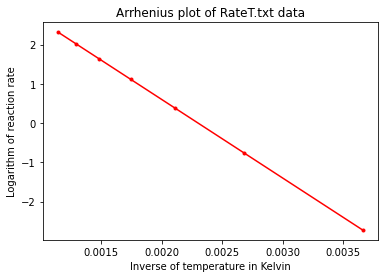

The data plotted in this way lies on a straight line because a straight line in the log plot of the reaction rate k means that the relationship between k and 1/T (where T is the temperature in Kelvin) is exponential. This makes sense because the Arrhenius equation is k = A*exp(-E/(R*T)) where R is the gas constant, A is the prefactor, and E is the activation energy.

Activation energy: 16641.64031708867 J
Prefactor: 100.16265850015299 in SI units

Problem 4: HeatCapacity.txt


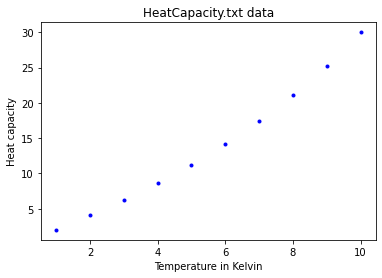

If 1.1160583495685127e-16 = 0 and 8.426000324584082e-16 = 0, then
A: 1.9999999999999982 J/k^2
B: 0.009999999999999978 J/k^4


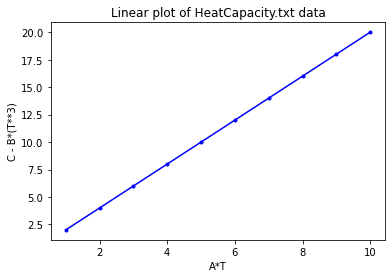


Problem 5: Flow.txt
The loglog() plot gives the clearest and most descriptive presentation of the data because the data in the loglog() plot is linear and using this information and then we can determine the approximate formula knowing that it will be a power law of some kind.

From the plots we see that there are two main different slopes and behaviours for small diameter (about less than 10^-1 = 0.1) and for large diameter (about more than 0.5).

Small diameter parameters:
	m: 0.7591774450859827
	b: 3.9216126560563156
	c: -1.683357342391061e-08

Small diameter power law behaviour: WaterFlowRate = (0.7591774450859827) * (TubeDiameter)^(3.9216126560563156) + (-1.683357342391061e-08)

Large diameter parameters:
	m: 0.9336524243499694
	b: 3.012773829393046
	c: -49.34357043579604

Large diameter power law behaviour: WaterFlowRate = (0.9336524243499694) * (TubeDiameter)^(3.012773829393046) + (-49.34357043579604)

General diameter parameters:
	m: 0.9326192516843377
	b: 3.0130103110705373
	

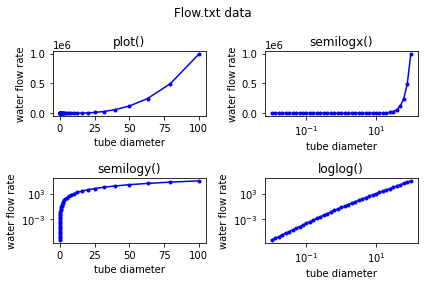

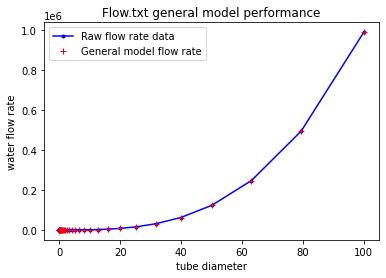

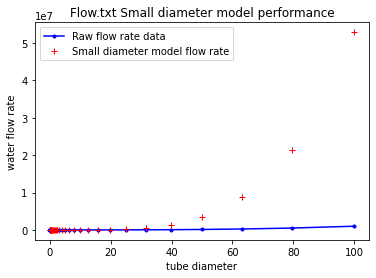

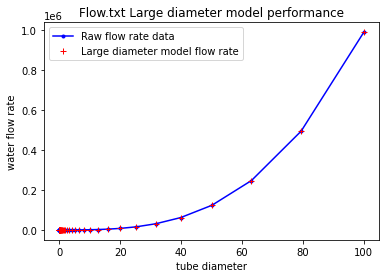

In [1]:
# Load the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# RateT.txt plot

print("Problem 3: RateT.txt")

# Load input data from file RateT.txt, comma separated
RateTData = np.loadtxt("RateT.txt", delimiter=",")

# Separate data into temperature and reaction rate
temperatureInCelsius = RateTData[:,0]
reactionRate = RateTData[:,1]

# Convert Celsius temperature data to Kelvin
temperatureInKelvin = temperatureInCelsius + 273.15

# Plot the figure
plt.figure(1)
plt.plot(1 / temperatureInKelvin, np.log(reactionRate), 'r.-')
plt.title('Arrhenius plot of RateT.txt data')
plt.xlabel('Inverse of temperature in Kelvin')
plt.ylabel('Logarithm of reaction rate')
plt.show()

print("The data plotted in this way lies on a straight line because a straight line in the log plot of the reaction rate k means that the relationship between k and 1/T (where T is the temperature in Kelvin) is exponential. This makes sense because the Arrhenius equation is k = A*exp(-E/(R*T)) where R is the gas constant, A is the prefactor, and E is the activation energy.\n")

# Find the activation energy (E) and the prefactor (A)
# Find the slope m and intercept of the straight line in the plot b for log(k) = m*(1/T) + b
m, b = np.polyfit(1 / temperatureInKelvin, np.log(reactionRate), 1)

# Now to calculate activation energy (E) and prefactor (A)
R = 8.31446261815324
activationEnergy = -(R*m)
prefactor = np.exp(b)

print("Activation energy:", activationEnergy, "J")
print("Prefactor:", prefactor, "in SI units")


# HeatCapacity.txt

print("\nProblem 4: HeatCapacity.txt")

# Load data from file HeatCapacity.txt
HeatCapacityData = np.loadtxt("HeatCapacity.txt", delimiter=",")

# Seperate data into temperature in Kelvin and heat capacity
heatTemperatureInKelvin = HeatCapacityData[:,0]
heatCapacity = HeatCapacityData[:,1]

# Plot relationship between temparture and heat capacity
# Expected behaviour is C = A*T + B*(T**3)
plt.figure(2)
plt.plot(heatTemperatureInKelvin, heatCapacity, "b.")
plt.title("HeatCapacity.txt data")
plt.xlabel("Temperature in Kelvin")
plt.ylabel("Heat capacity")
plt.show()

# Try 3rd degree polynomail fit to determine A and B
B, _, A, __ = np.polyfit(heatTemperatureInKelvin, heatCapacity, 3)
# Make sure that _, __ are pretty much zero
print("If", _, "= 0 and", __, "= 0, then")
print("A:", A, "J/k^2")
print("B:", B, "J/k^4")

# Since _ and __ are practically zero we have verified that the relationship
# is C = B*(T**3) + _*(T**2) + A*T + __ = A*T + B*(T**3)

# Plot the data on a straight line
# On the y-axis we will plot C - B*(T**3) and on the x-axis A*T
# to ensure linear behaviour of the data
plt.figure(3)
linearData = heatCapacity - B*(heatTemperatureInKelvin**3)
plt.plot(heatTemperatureInKelvin, linearData, "b.-")
plt.title("Linear plot of HeatCapacity.txt data")
plt.xlabel("A*T")
plt.ylabel("C - B*(T**3)")
plt.show()


# Flow.txt

print("\nProblem 5: Flow.txt")

# Load data from file Flow.txt
FlowData = np.loadtxt("Flow.txt", delimiter=",")

# Seperate data into tube diameter and water flow rate
tubeDiameter = FlowData[:,0]
waterFlowRate = FlowData[:,1]

# Create four subplots of plotting the data in different ways: plot(), semilogx(), semilogy(), and loglog()
fig, axs = plt.subplots(2, 2)

fig.suptitle("Flow.txt data")

# Top left use standard plot()
axs[0,0].plot(tubeDiameter, waterFlowRate, "b.-")
axs[0,0].set_title("plot()")
# Top right use semilogx()
axs[0,1].semilogx(tubeDiameter, waterFlowRate, "b.-")
axs[0,1].set_title("semilogx()")
# Bottom left use semilogy()
axs[1,0].semilogy(tubeDiameter, waterFlowRate, "b.-")
axs[1,0].set_title("semilogy()")
# Bottom right use loglog()
axs[1,1].loglog(tubeDiameter, waterFlowRate, "b.-")
axs[1,1].set_title("loglog()")

for ax in axs.flat:
    ax.set(xlabel='tube diameter', ylabel='water flow rate')

fig.tight_layout()

print("The loglog() plot gives the clearest and most descriptive presentation of the data because the data in the loglog() plot is linear and using this information and then we can determine the approximate formula knowing that it will be a power law of some kind.\n")

# Power law is y = m*(x**b) + c
def powerlaw(x, m, b, c):
    return m * x**b + c

print("From the plots we see that there are two main different slopes and behaviours for small diameter (about less than 10^-1 = 0.1) and for large diameter (about more than 0.5).\n")

# Calculate parameters m, b, c for different diameters
# Segregate dataset for smaller (less than 0.1) and larger (more than 0.5) tube diameters
smallTubeDiameter, smallTubeFlowRate, largeTubeDiameter, largeTubeFlowRate = [], [], [], []

for i in range(len(tubeDiameter)):
    if tubeDiameter[i] <= 0.1:
        smallTubeDiameter += [tubeDiameter[i]]
        smallTubeFlowRate += [waterFlowRate[i]]
    elif tubeDiameter[i] >= 0.5:
        largeTubeDiameter += [tubeDiameter[i]]
        largeTubeFlowRate += [waterFlowRate[i]]


smallDiameterParameters, smallCovs = curve_fit(powerlaw, smallTubeDiameter, smallTubeFlowRate)
print("Small diameter parameters:")
print("\tm:", smallDiameterParameters[0])
print("\tb:", smallDiameterParameters[1])
print("\tc:", smallDiameterParameters[2])
print("\nSmall diameter power law behaviour: WaterFlowRate = (" + str(smallDiameterParameters[0]) + ") * (TubeDiameter)^(" + str(smallDiameterParameters[1]) + ") + (" + str(smallDiameterParameters[2]) + ")")

largeDiameterParameters, largeCovs = curve_fit(powerlaw, largeTubeDiameter, largeTubeFlowRate)
print("\nLarge diameter parameters:")
print("\tm:", largeDiameterParameters[0])
print("\tb:", largeDiameterParameters[1])
print("\tc:", largeDiameterParameters[2])
print("\nLarge diameter power law behaviour: WaterFlowRate = (" + str(largeDiameterParameters[0]) + ") * (TubeDiameter)^(" + str(largeDiameterParameters[1]) + ") + (" + str(largeDiameterParameters[2]) + ")")

# Calculate for entire dataset to see if it makes sense
diameterParameters, covs = curve_fit(powerlaw, tubeDiameter, waterFlowRate)
print("\nGeneral diameter parameters:")
print("\tm:", diameterParameters[0])
print("\tb:", diameterParameters[1])
print("\tc:", diameterParameters[2])
print("\nGeneral diameter power law behaviour: WaterFlowRate = (" + str(diameterParameters[0]) + ") * (TubeDiameter)^(" + str(diameterParameters[1]) + ") + (" + str(diameterParameters[2]) + ")")

# Check to see if models (set of parameters) fit the data well

# Begin with general model
generalModelFlowRate = []

for i in range(len(tubeDiameter)):
    generalModelFlowRate += [powerlaw(tubeDiameter[i], diameterParameters[0], diameterParameters[1], diameterParameters[2])]

plt.figure(6)
plt.plot(tubeDiameter, waterFlowRate, "b.-")
plt.plot(tubeDiameter, generalModelFlowRate, "r+")
plt.title("Flow.txt general model performance")
plt.xlabel("tube diameter")
plt.ylabel("water flow rate")
plt.legend(("Raw flow rate data", "General model flow rate"))
plt.show()

# Now on to small diameter model
smallDiameterModelFlowRate = []

for i in range(len(tubeDiameter)):
    smallDiameterModelFlowRate += [powerlaw(tubeDiameter[i], smallDiameterParameters[0], smallDiameterParameters[1], smallDiameterParameters[2])]

plt.figure(7)
plt.plot(tubeDiameter, waterFlowRate, "b.-")
plt.plot(tubeDiameter, smallDiameterModelFlowRate, "r+")
plt.title("Flow.txt Small diameter model performance")
plt.xlabel("tube diameter")
plt.ylabel("water flow rate")
plt.legend(("Raw flow rate data", "Small diameter model flow rate"))
plt.show()

# Finish with large diameter model
largeDiameterModelFlowRate = []

for i in range(len(tubeDiameter)):
    largeDiameterModelFlowRate += [powerlaw(tubeDiameter[i], largeDiameterParameters[0], largeDiameterParameters[1], largeDiameterParameters[2])]

plt.figure(8)
plt.plot(tubeDiameter, waterFlowRate, "b.-")
plt.plot(tubeDiameter, largeDiameterModelFlowRate, "r+")
plt.title("Flow.txt Large diameter model performance")
plt.xlabel("tube diameter")
plt.ylabel("water flow rate")
plt.legend(("Raw flow rate data", "Large diameter model flow rate"))
plt.show()

